#**Loading of Data**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("GSAF5.xls")
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,27th November,2025.0,Unprovoked,Australia,NSW,Crowdy Bay,Swimming,Lukas Schindler,M,26,...,3m Bull shark,Media: Todd Smith: Andy Currie: Simon De March...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27th November,2025.0,Unprovoked,Australia,NSW,Crowdy Bay,Swimming,Livia Mulheim,F,25,...,3m Bull shark,Media: Todd Smith: Andy Currie: Simon De March...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10th November,2025.0,Unprovoked,Australia,Western Australia,Prevelly Beach Magaret River,Foil Boarding,Andy McDonald,M,61,...,Great White Shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9th November,2025.0,Unprovoked,French Polynesia,Marquesas Islands,Hakahau Bay,Swimming,Not stated (Dentist),M,40,...,3m shark,Andrew Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5th November,2025.0,Unprovoked,USA,Hawaii,Pine Trees Hanalei Bay Kaui,Swimming,Chance Swanson,M,?,...,Unknown,James Kingsley: Andy Currie: Beat of Hawaii:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
7053,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7054,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7055,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7056,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
7057,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [4]:
df.shape

(7058, 23)

# **Initial exploration of dataset**

In [5]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [6]:
numeric_col = df.select_dtypes(include='number').columns
numeric_col

Index(['Year', 'original order'], dtype='object')

In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 21,7057
Unnamed: 22,7056
Time,3526
Species,3131
Age,2994
Activity,585
Sex,579
Location,567
Fatal Y/N,561
State,487


In [8]:
df.isnull().mean().sort_values(ascending=False)*100

,0
Unnamed: 21,99.985832
Unnamed: 22,99.971663
Time,49.957495
Species,44.361009
Age,42.419949
Activity,8.288467
Sex,8.203457
Location,8.033437
Fatal Y/N,7.948427
State,6.899972


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7058 non-null   object 
 1   Year            7056 non-null   float64
 2   Type            7040 non-null   object 
 3   Country         7008 non-null   object 
 4   State           6571 non-null   object 
 5   Location        6491 non-null   object 
 6   Activity        6473 non-null   object 
 7   Name            6839 non-null   object 
 8   Sex             6479 non-null   object 
 9   Age             4064 non-null   object 
 10  Injury          7023 non-null   object 
 11  Fatal Y/N       6497 non-null   object 
 12  Time            3532 non-null   object 
 13  Species         3927 non-null   object 
 14  Source          7038 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7056.0,1935.823554,270.946513,0.0,1948.0,1986.0,2010.0,2026.0
original order,6799.0,3401.152081,1963.076319,2.0,1701.5,3401.0,5100.5,6802.0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
(df['Case Number'] == df['Case Number.1']).value_counts()

,count
True,6748
False,310


In [13]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("/","_",regex=False).str.strip("_")
df.columns


Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y_n', 'time', 'species',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'],
      dtype='object')

In [14]:
df['country'].value_counts()

,count
country,
USA,2575
AUSTRALIA,1481
SOUTH AFRICA,597
NEW ZEALAND,144
BAHAMAS,136
...,...
BAHREIN,1
KOREA,1
RED SEA?,1


In [15]:
df['country'] = (df['country'].str.strip().str.upper())


In [16]:
df['country'].unique()

array(['AUSTRALIA', 'FRENCH POLYNESIA', 'USA', 'SAMOA', 'COLUMBIA',
       'COSTA RICA', 'BAHAMAS', 'PUERTO RICO', 'SPAIN', 'CANARY ISLANDS',
       'SOUTH AFRICA', 'VANUATU', 'JAMAICA', 'ISRAEL', 'MEXICO',
       'MALDIVES', 'PHILIPPINES', 'TURKS AND CAICOS', 'MOZAMBIQUE',
       'NEW CALEDONIA', 'EGYPT', 'THAILAND', 'NEW ZEALAND', 'HAWAII',
       'HONDURAS', 'INDONESIA', 'MOROCCO', 'BELIZE', 'MALDIVE ISLANDS',
       'TOBAGO', 'INDIA', 'TRINIDAD', 'CORAL SEA', 'PORTUGAL', 'COLOMBIA',
       'ECUADOR', 'CUBA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA', 'FIJI',
       'ENGLAND', 'JAPAN', 'BRITISH OVERSEAS TERRITORY', 'CANADA',
       'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN', 'PAPUA NEW GUINEA',
       'REUNION ISLAND', 'CHINA', 'IRELAND', 'ITALY', 'MALAYSIA', 'LIBYA',
       nan, 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', '

In [17]:
df['country'] = df['country'].replace({'CEYLON (SRI LANKA)':'SRI LANKA','CEYLON': 'SRI LANKA'})

In [18]:
df['country']= df['country'].replace({'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES', 'AFRICA': 'COAST OF AFRICA', 'BURMA': 'MYANMAR',
    'WESTERN SAMOA': 'SAMOA', 'TURKS & CAICOS': 'TURKS AND CAICOS',
    'TRINIDAD & TOBAGO': 'TRINIDAD AND TOBAGO',
    'ST. MARTIN': 'ST MARTIN',
    'ST. MAARTIN': 'ST MARTIN'})

In [19]:
water_keywords = [
    'OCEAN', 'SEA', 'GULF', 'BAY', 'COAST', 'ATLANTIC', 'PACIFIC',
    'INDIAN', 'MEDITERRANEAN', 'CARIBBEAN'
]

mask_water = df['country'].str.contains(
    '|'.join(water_keywords),
    na=False
)

df.loc[mask_water, 'country']

#rows can later become:

# country = NaN
# region = "PACIFIC OCEAN"

,country
149,CORAL SEA
344,BRITISH OVERSEAS TERRITORY
833,"ST HELENA, BRITISH OVERSEAS TERRITORY"
874,"ST HELENA, BRITISH OVERSEAS TERRITORY"
1174,ATLANTIC OCEAN
...,...
6897,MEDITERRANEAN SEA
6984,RED SEA?
6990,MEDITERRANEAN SEA
7013,NORTH PACIFIC OCEAN


In [35]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df['age'].describe().T

,age
count,3916.000000
mean,28.169561
std,14.672164
min,1.000000
25%,17.000000
50%,24.000000
75%,37.000000
max,87.000000


In [39]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [40]:
df['year'].describe()

,year
count,7056.000000
mean,1935.823554
std,270.946513
min,0.000000
25%,1948.000000
50%,1986.000000
75%,2010.000000
max,2026.000000


In [22]:
df['fatal_y_n'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [23]:
df['fatal_y_n'] = df['fatal_y_n'].str.lower().str.strip()

In [24]:
df['fatal_y_n'].unique()

array(['n', 'y', 'f', 'm', nan, 'nq', 'unknown', 'y x 2'], dtype=object)

In [25]:
df['fatal_y_n'] = df['fatal_y_n'].replace({'nan': 'unknown', 'm':'n', 'f': 'unkown','nq':'unknown','y x 2':'y' })

In [26]:
df['fatal_y_n'].unique()

array(['n', 'y', 'unkown', nan, 'unknown'], dtype=object)

In [27]:
df['activity'].value_counts()

,count
activity,
Surfing,1141
Swimming,1010
Fishing,494
Spearfishing,391
Wading,178
...,...
"Surfing, fell off surfboard",1
"3,909-ton Panamanian freighter Chieh Lee sank in a typhoon",1
"Skindiving,",1


In [28]:
df['type'].value_counts()

,count
type,
Unprovoked,5211
Provoked,640
Invalid,552
Watercraft,355
Sea Disaster,242
Questionable,26
Boat,7
Provoked,2
unprovoked,1


In [29]:
df['sex'].value_counts()

,count
sex,
M,5660
F,806
M,4
F,2
N,2
M,1
m,1
lli,1
M x 2,1


In [30]:
df['sex'].unique()

array(['M', 'F', 'F ', 'M ', nan, ' M', 'm', 'lli', 'M x 2', 'N', '.'],
      dtype=object)

In [31]:
df['sex'] = df['sex'].str.lower().str.strip()

In [32]:
df['sex'].unique()

array(['m', 'f', nan, 'lli', 'm x 2', 'n', '.'], dtype=object)

In [33]:
df['sex'] = df['sex'].replace({'m x 2':'m','lli':'unknown', '.':'unknown', 'n':'m'})

In [34]:
df['sex'].unique()

array(['m', 'f', nan, 'unknown'], dtype=object)

# **Visualisation**

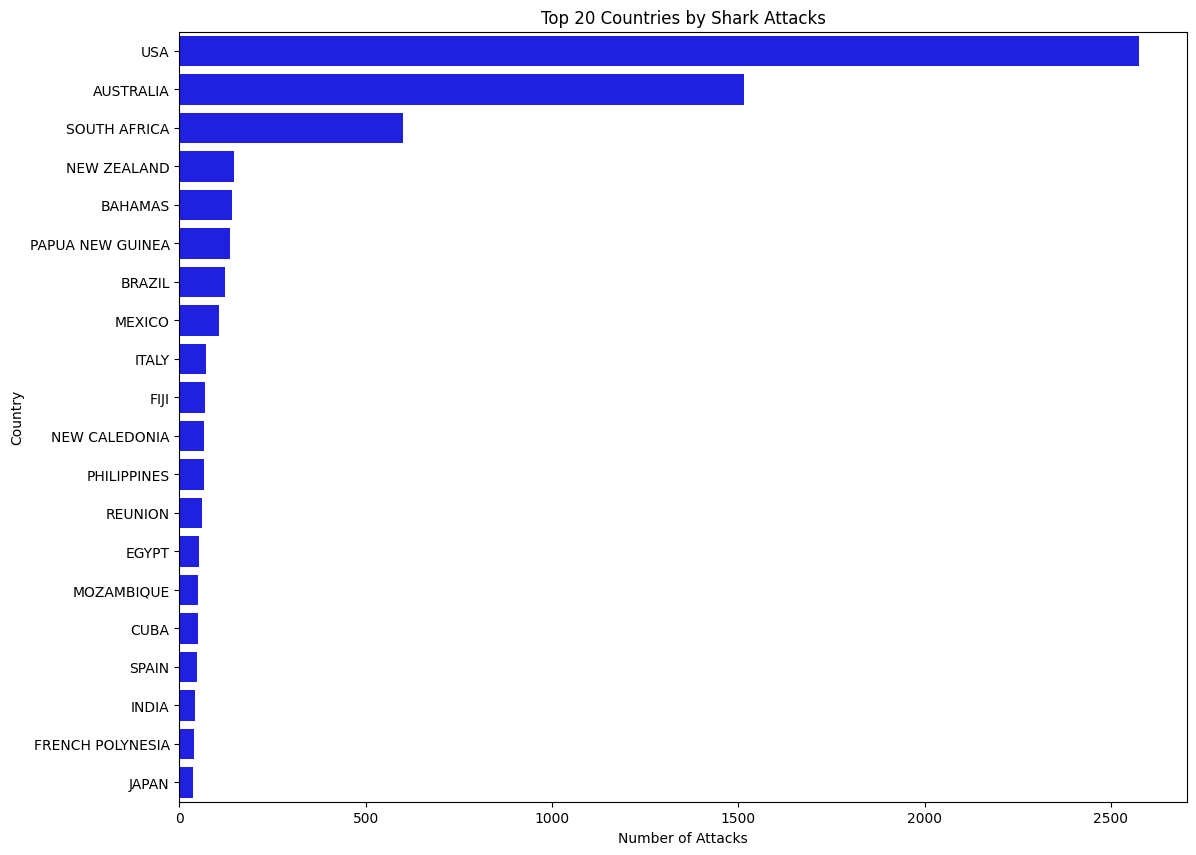

In [55]:

plt.figure(figsize=(13,10))
sns.countplot(y='country', data=df, order=df['country'].value_counts().iloc[:20].index, color='blue')
plt.title("Top 20 Countries by Shark Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()

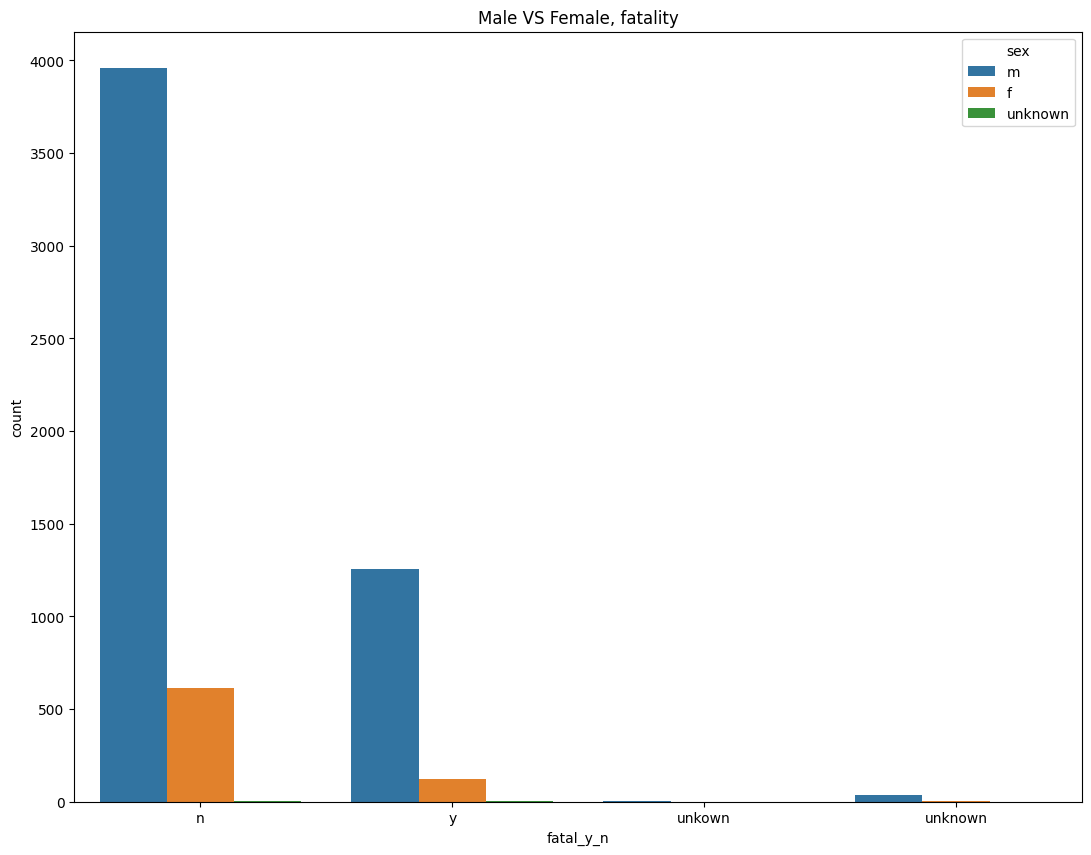

In [56]:
plt.figure(figsize=(13,10))
sns.countplot(x='fatal_y_n', hue=('sex'), data=df)
plt.title("Male VS Female, fatality")
plt.show()


In [59]:
import geopandas as gpd

<Axes: xlabel='year'>

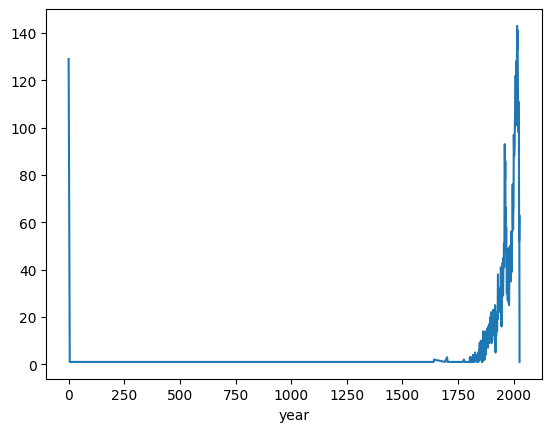

In [63]:
df.groupby('year').size().plot()

In [68]:
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()
corr

,year,age,original_order
year,1.000000,0.079264,0.387247
age,0.079264,1.000000,0.216481
original_order,0.387247,0.216481,1.000000


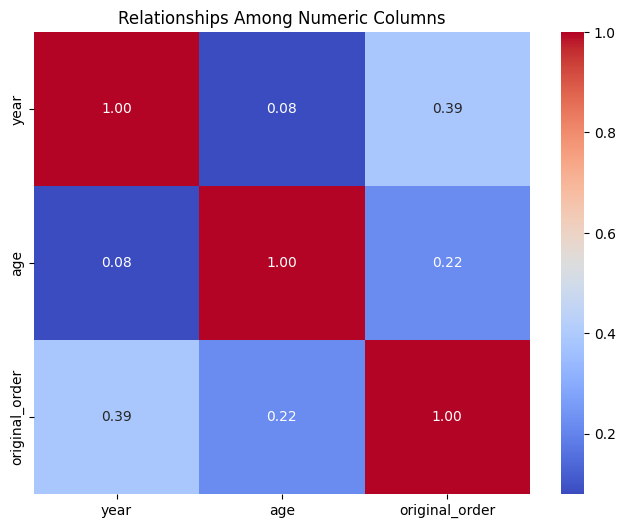

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Relationships Among Numeric Columns")
plt.show()

In [62]:
pd.crosstab(df['country'], df['fatal_y_n'])

fatal_y_n,n,unknown,unkown,y
country,,,,
ADMIRALTY ISLANDS,1,0,0,0
ALGERIA,0,0,0,1
AMERICAN SAMOA,0,0,0,3
ANDAMAN / NICOBAR ISLANDAS,0,0,0,1
ANDAMAN ISLANDS,0,0,0,1
...,...,...,...,...
VANUATU,4,1,0,10
VENEZUELA,6,0,0,5
VIETNAM,13,0,0,2


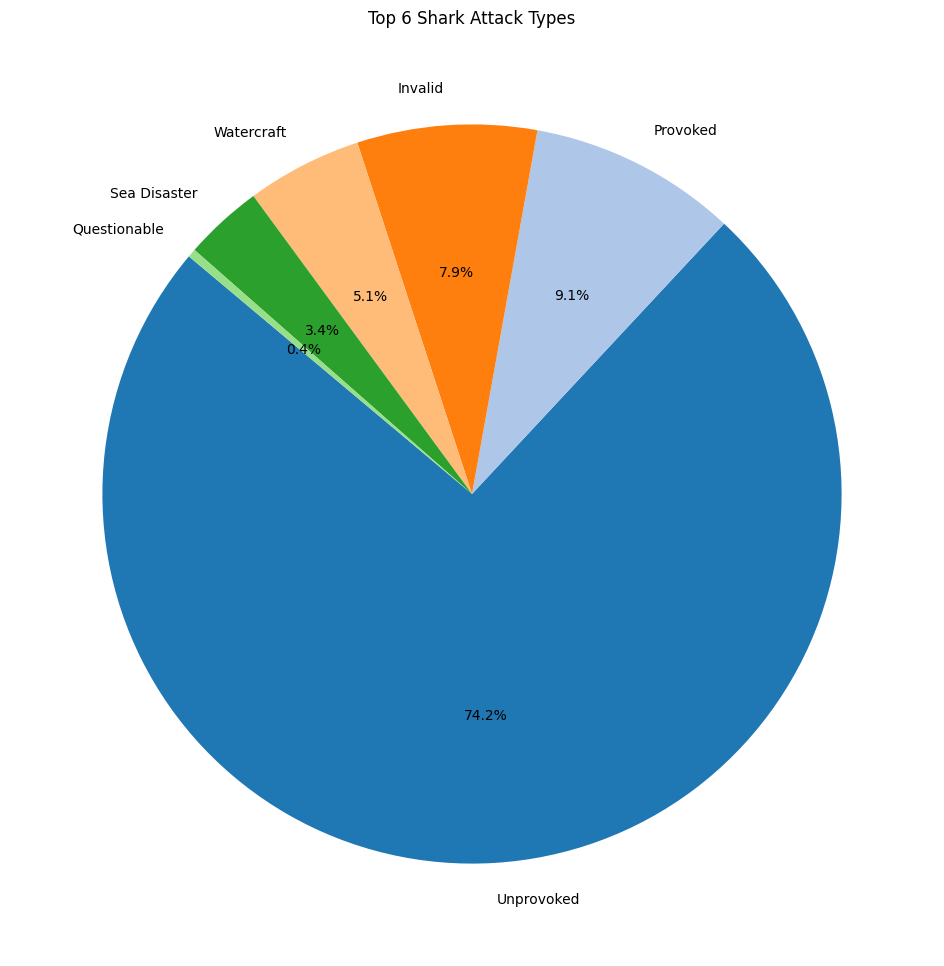

In [79]:
top_type = df['type'].value_counts().head(6)

plt.figure(figsize=(13,12))
plt.pie(
    top_type,
    labels=top_type.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Top 6 Shark Attack Types")
plt.show()

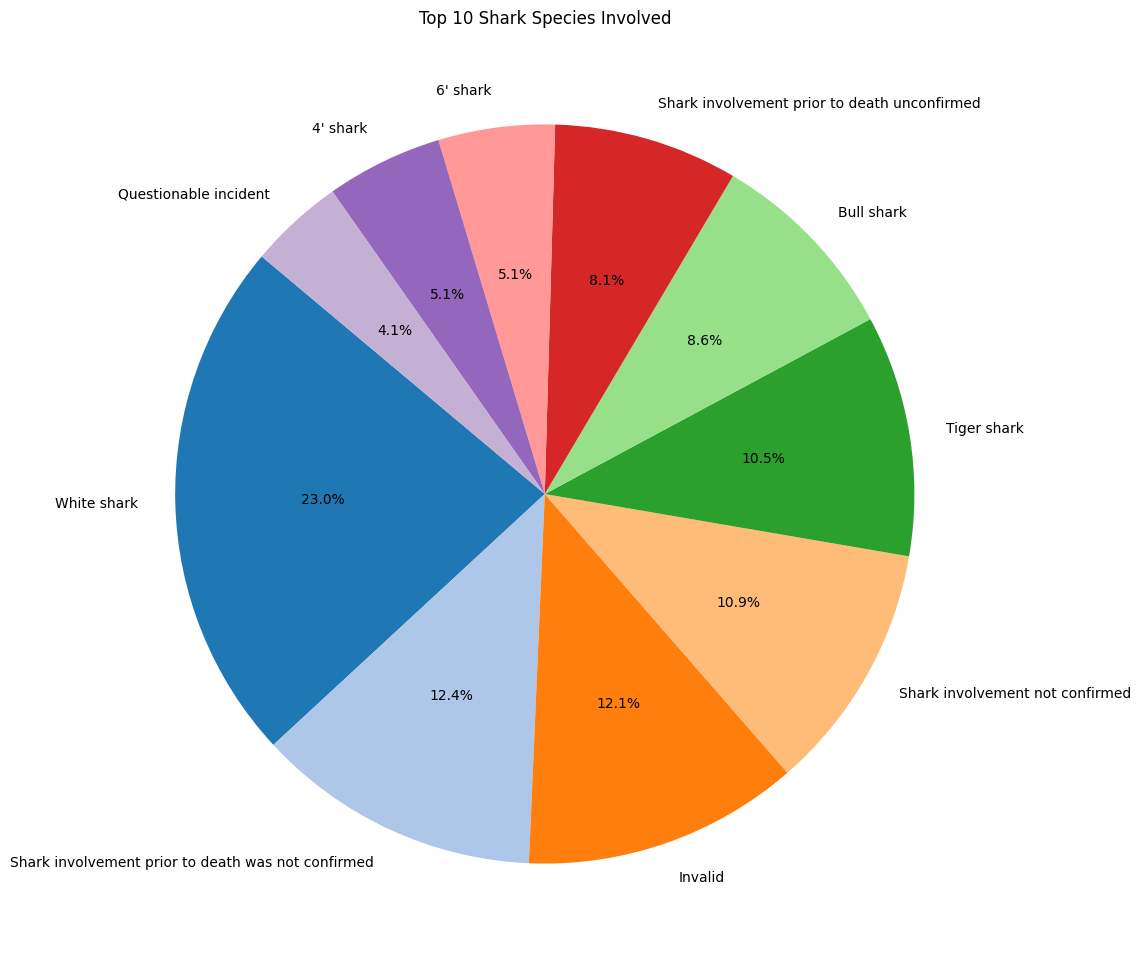

In [80]:
top_species = df['species'].value_counts().head(10)

plt.figure(figsize=(13,12))
plt.pie(
    top_species,
    labels=top_species.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Top 10 Shark Species Involved")
plt.show()